In [122]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)

df1 = pd.read_excel('./DDS9_Data_Extract_with_labels.xlsx')
df2 = pd.read_excel('./DDS10_Data_Extract_with_labels.xlsx')
df3 = pd.read_excel('./DDS11_Data_Extract_with_labels.xlsx')

In [123]:
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)

In [178]:
BaseDemographic = ['Age Range', 'Employment Status', 'Ethnicity', 'Gender', 'Region', 'State']

ChildDemographics = ['HasChildren', 'Children 10to13', 'Children 14to18', 'Children 19to25', 
                     'Children 26Up', 'Children 5to9', 'Children under 4']

FrequentApps = ['FrequentApp-Banking', 'FrequentApp-Books', 'FrequentApp-Browser', 
                'FrequentApp-Business', 'FrequentApp-Dating', 'FrequentApp-Education', 
                'FrequentApp-Food', 'FrequentApp-Games', 'FrequentApp-Health', 
                'FrequentApp-Hobbies', 'FrequentApp-Language', 'FrequentApp-Location', 
                'FrequentApp-Magazines', 'FrequentApp-Messaging', 'FrequentApp-Movie', 
                'FrequentApp-Music', 'FrequentApp-Navigation', 'FrequentApp-News', 
                'FrequentApp-Newspaper', 'FrequentApp-None', 'FrequentApp-Photo', 
                'FrequentApp-Productivity', 'FrequentApp-QRReader', 'FrequentApp-Reservations', 
                'FrequentApp-Retail', 'FrequentApp-Reviews', 'FrequentApp-SocialMedia', 
                'FrequentApp-Sports', 'FrequentApp-Tickets', 'FrequentApp-Transport', 
                'FrequentApp-Travel', 'FrequentApp-Unknown', 'FrequentApp-Utilities', 
                'FrequentApp-VOIP', 'FrequentApp-VideoStreaming', 'FrequentApp-Weather']

HasItems = ['Has3dPrinter', 'HasBasicPhone', 'HasBluRay', 'HasDVR', 'HasDesktop', 
           'HasDrone', 'HasEReader', 'HasFitnessBand', 'HasFlatPanelTelevision', 'HasGamingConsole', 
           'HasLaptop', 'HasLaptopHybrid', 'HasLargeSmartphone', 'HasLargeTablet', 'HasNoDevices', 
           'HasOverAirDigitalTV', 'HasPortableGamingConsole', 'HasPortableStreaming', 'HasSmallSmartphone', 
           'HasSmallTablet', 'HasSmartGlasses', 'HasSmartPhone', 'HasSmartWatch', 'HasStreamingBox', 
           'HasTablet', 'HasThumbdrive', 'HasVRHeadSet', 'HasWirelessRouter']

PurchaseItems = ['Purchase3DPrinter', 'PurchaseBasicPhone', 'PurchaseBluRay', 'PurchaseDVR', 
                 'PurchaseDesktop', 'PurchaseDrone', 'PurchaseEReader', 'PurchaseFitnessBand', 
                 'PurchaseFlatPanelTelevision', 'PurchaseGamingConsole', 'PurchaseLaptop', 'PurchaseLaptopHybrid', 
                 'PurchaseLargeSmartphone', 'PurchaseLargeTablet', 'PurchaseNoDevices', 'PurchaseNone', 
                 'PurchaseOverAirDigitalTV', 'PurchasePortableGamingConsole', 'PurchaseSmallSmartphone', 'PurchaseSmallTablet', 
                 'PurchaseSmartGlasses', 'PurchaseSmartPhone', 'PurchaseSmartWatch', 'PurchaseStreamingBox', 
                 'PurchaseTablet', 'PurchaseThumbdrive', 'PurchaseUnknown', 
                 'PurchaseVRHeadset', 'PurchaseWirelessRouter']

valueItems = ['Value3DPrinter', 'ValueBasicPhone', 'ValueBlueRay', 'ValueDVR', 'ValueDesktop', 
              'ValueDrone', 'ValueEReader', 'ValueFitnessBand', 'ValueFlatPanelTelevision', 'ValueGamingConsole', 
              'ValueLaptop', 'ValueLaptopHybrid', 'ValueLargeSmartphone', 'ValueLargeTablet', 'ValueNetworkRouter', 
              'ValueOverAirTV', 'ValuePlaceHolder', 'ValuePlaceholder', 'ValuePortableGamingConsole', 'ValueSmallSmartphone', 
              'ValueSmallTablet', 'ValueSmartGlasses', 'ValueSmartPhone', 'ValueSmartWatch', 'ValueStreamingBox', 
              'ValueTablet', 'ValueThumbDrive', 'ValueVRHeadset']

TimeWatching = ['TimeWatchingMoviesPC', 'TimeWatchingMoviesSmartphone', 'TimeWatchingMoviesTV', 'TimeWatchingMoviesTablet',
                'TimeWatchingSportsPC', 'TimeWatchingSportsSmartphone', 'TimeWatchingSportsTV', 'TimeWatchingSportsTablet', 
                'TimeWatchingTvPC', 'TimeWatchingTvSmartphone', 'TimeWatchingTvTV', 'TimeWatchingTvTablet']



In [180]:
# replace all yes and nos
YesNoQuestions = [ChildDemographics, FrequentApps, HasItems,PurchaseItems]
flattenedYesNo = [val for sublist in YesNoQuestions for val in sublist]

for i in flattenedYesNo:
    if i in df1.columns:
        df1[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df2.columns:
        df2[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df3.columns:
        df3[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    
    

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

# Correlating Item Ownership

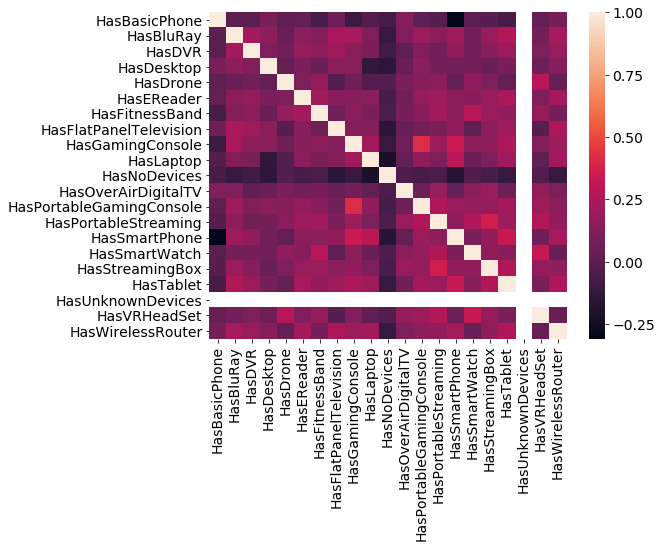

In [91]:
hasItems2 = np.intersect1d(HasItems, df2.columns)
hasItemMap2 = df2[hasItems2]

corr = hasItemMap2.corr(method='spearman')
plt.clf()
sns.heatmap(corr)
plt.show()

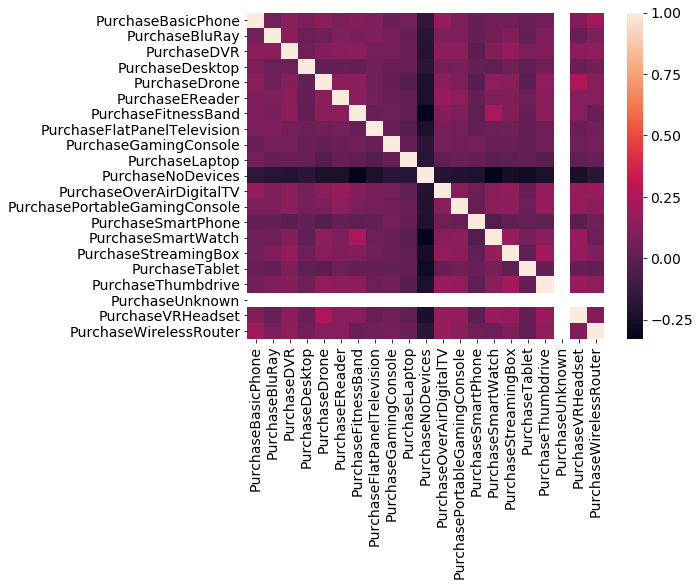

In [83]:
purchaseItems2 = np.intersect1d(PurchaseItems, df2.columns)
purchaseItemMap2 = df2[purchaseItems2]

corr = purchaseItemMap2.corr()
plt.clf()
sns.heatmap(corr)
plt.show()

In [204]:
def Group_Age (row, ranges):
    if(row['Age'] <= ranges[0]):
        return 'Gen Y'
    if(row['Age'] > ranges[0] and row['Age'] <= ranges[1]):
        return 'Millenial'
    if(row['Age'] > ranges[1] and row['Age'] <= ranges[2]):
        return 'Gen X'
    if(row['Age'] > ranges[2] and row['Age'] <= ranges[3]):
        return 'Baby Boomer'
    if(row['Age'] > ranges[3]):
        return 'Mature'
    
df1['Age Group'] = df1.apply(lambda row: Group_Age(row, [13.0, 26.0, 43.0, 62.0]), axis=1)
df2['Age Group'] = df2.apply(lambda row: Group_Age(row, [13.0, 26.0, 43.0, 62.0]), axis=1)
df3['Age Group'] = df3.apply(lambda row: Group_Age(row, [13.0, 26.0, 43.0, 62.0]), axis=1)

In [222]:
# plot percentages of age groups who own products

# the process above runs out of memory at about row 2000, so I am just going to do cut my sample off at that unless theres an easy fix
AgeGroup1 = df1['Age Group'][:2000]
AgeGroup2 = df2['Age Group'][:2000]
AgeGroup3 = df3['Age Group'][:2000]


hasItems1 = np.intersect1d(HasItems, df1.columns)
hasItems2 = np.intersect1d(HasItems, df2.columns)
hasItems3 = np.intersect1d(HasItems, df3.columns)


AgeGroups = np.unique([AgeGroup1, AgeGroup2, AgeGroup3])

hasItems_2009 = df1[0:2000].groupby('Age Group')[hasItems1].sum().apply(lambda x: x*100 / x.sum())
hasItems_2010 = df1[0:2000].groupby('Age Group')[hasItems2].sum().apply(lambda x: x*100 / x.sum())
hasItems_2011 = df1[0:2000].groupby('Age Group')[hasItems3].sum().apply(lambda x: x*100 / x.sum())

hasItemsYearGroup = [hasItems_2009, hasItems_2010, hasItems_2011]

KeyError: "Columns not found: 'HasSmartPhone', 'HasTablet', 'HasOverAirDigitalTV', 'HasDrone', 'HasVRHeadSet', 'HasPortableStreaming'"

In [221]:
fig, ax = plt.subplots()
index = np.arange(len(hasItems1))
bar_width = 0.2
opacity = 0.8

for group in hasItemsYearGroup:
    rects1 = plt.bar(index+ bar_width, group.iloc[3], bar_width,
                 alpha=opacity, label='Millenials')

    rects2 = plt.bar(index+ (2*bar_width), group.iloc[1], bar_width,
                 alpha=opacity, label='Gen X')

    rects3 = plt.bar(index+ (3*bar_width), group.iloc[0], bar_width,
                 alpha=opacity, label='Baby Boomer')

    rects3 = plt.bar(index+ (4*bar_width), group.iloc[2], bar_width,
                 alpha=opacity, label='Mature')

    plt.ylabel('Percent of owners')
    plt.xlabel('Type of Device')
    plt.title('Ownership of device by age demographic')
    plt.xticks(index + (bar_width), hasItems_2009.keys(), rotation = 90)
    plt.legend()
 

    plt.show()

NameError: name 'hasItemsYearGroup' is not defined